In [1]:
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import haddock_ssnmf
from haddock_ssnmf import Haddock_SSNMF

import display_ssnmf
from display_ssnmf import *


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(3598, 14)
Index(['Fatigue', 'Headache', 'Joint Pain', 'Muscle aches', 'Neuropathy',
       'Twitching', 'Memory Loss', 'Cognitive Impairment', 'Sleep Impairment',
       'Psychiatric', 'Heart related', 'Gastrointestinal', 'non_neuro',
       'neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000Number of iterations: 1000

Number of iterations: 1000Number of iterations: 1000Number of iterations: 1000

Number of iterations: 1000
Number of iterations: 1000

Number of iterations: 1000Number of iterations: 1000Number of iterations: 1000Number of iterations: 1000Number of iterations: 1000Number of iterations: 1000

Number of iterations: 1000

Number of iterations: 1000

Number of iterations: 1000

Number of iterations: 1000Number of iterations: 1000Number of iterations: 1000
Number of iterations: 1000



Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000Number of iterations: 1000

Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
Number of iterations: 1000
N

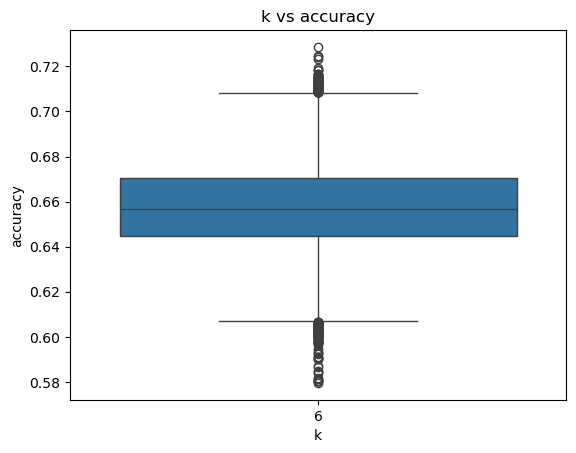

CNS1 Working Definition: Neuro vs Non-Neuro
best accuracy:  0.7286237922705314  best params:  {'k': 6, 'lambda': 6.030150753768844, 'random_state': 12}
test_accuracy:  0.7125


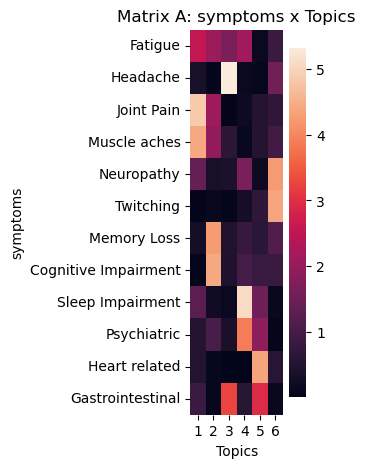

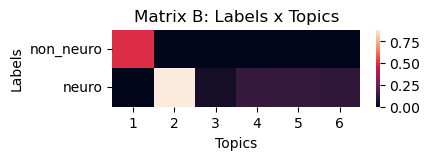

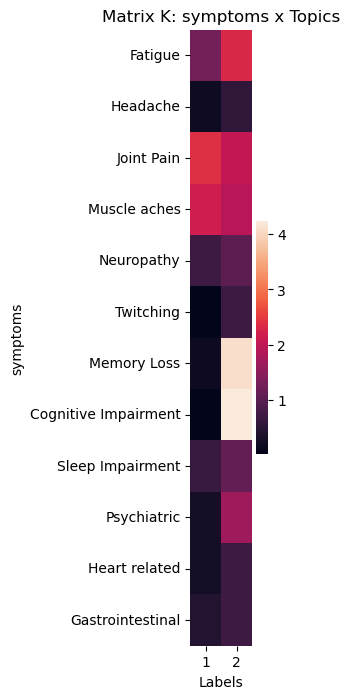

In [2]:
# CNS1 Defn
data = LymeData({CHRONIC, NEURO},{SYMPTOMS},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)

data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Haddock_SSNMF(data_matrix, label_matrix)
best_accuracy, best_params, accu_distr = ssnmf.gridsearch(param_range={'k': [6],'lambda': list(np.linspace(0,200,200)), 'random_state': range(0,100)},
                                                          get_topic_accu_distr=True)
display_distr(accu_distr)

print('CNS1 Working Definition: Neuro vs Non-Neuro')
print('best accuracy: ', best_accuracy, ' best params: ', best_params)
test_accuracy = ssnmf.test(best_params)
print('test_accuracy: ', test_accuracy)

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.best_model
display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)

# Total Neuro: 2569
# Total Non-Neuro: 1394

In [3]:
accu_distr.to_csv('cns1_nvn_k6.csv',index=False)
# best accuracy:  0.7359353864734299  best params:  {'k': 2, 'lambda': 52.26130653266331, 'random_state': 82}
# test_accuracy:  0.7375